#### Import the libraries

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### Import the dataset

In [70]:
dataset = pd.read_csv('Car Prices/CarPrice_Assignment.csv')
X = dataset[['carwidth', 'carlength' , 'carheight', 'enginesize', 'horsepower']]
y = dataset['price']

print(X.shape)
print(y.shape)

X.describe()

(205, 5)
(205,)


,carwidth,carlength,carheight,enginesize,horsepower
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,65.907805,174.049268,53.724878,126.907317,104.117073
std,2.145204,12.337289,2.443522,41.642693,39.544167
min,60.300000,141.100000,47.800000,61.000000,48.000000
25%,64.100000,166.300000,52.000000,97.000000,70.000000
50%,65.500000,173.200000,54.100000,120.000000,95.000000
75%,66.900000,183.100000,55.500000,141.000000,116.000000
max,72.300000,208.100000,59.800000,326.000000,288.000000


#### Normalize the data

In [71]:
scaler = MinMaxScaler()

X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.values.reshape(len(y), 1))

#### Split data into training set and test set

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size = .20, random_state = 1)

print(X_train.shape)
print(y_train.shape)

(164, 5)
(164, 1)


#### Fitting simple linear regression to training set 

In [73]:
model = LinearRegression()
model.fit(X_norm, y_norm)

LinearRegression()

#### Predicting the test set results

In [74]:
y_pred = model.predict(X_test)

#### Visualizing the training set

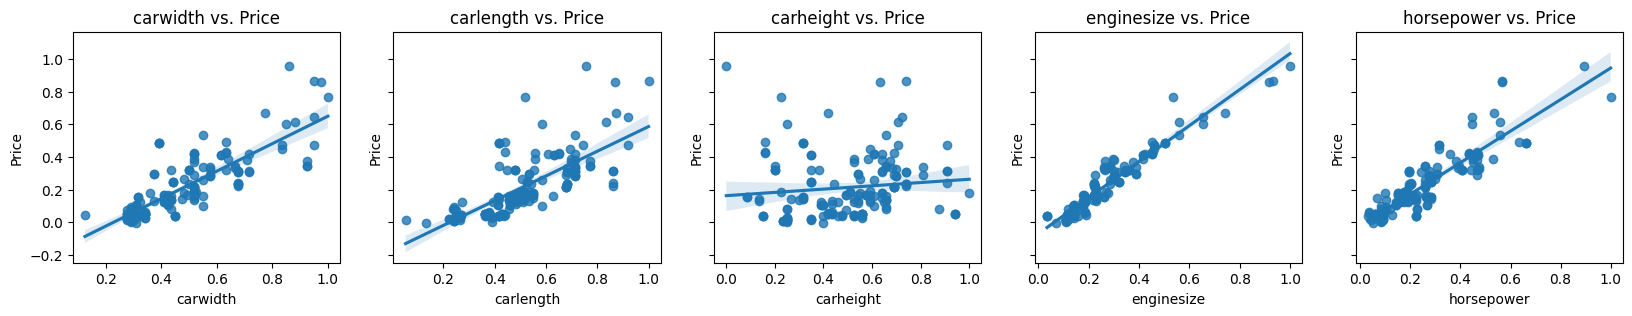

In [75]:
features = ['carwidth', 'carlength' , 'carheight', 'enginesize', 'horsepower']

row = 1
col = len(features)//row

fig, axs = plt.subplots(row, col, figsize = (20, 3), sharey = True)

for i, feature in enumerate(features):
    sns.regplot(x = X_train[:, i], y = model.predict(X_train), ax = axs[i])
    axs[i].set(xlabel = feature, ylabel = "Price", title = f"{feature} vs. Price")


#### Visualizing the test set 

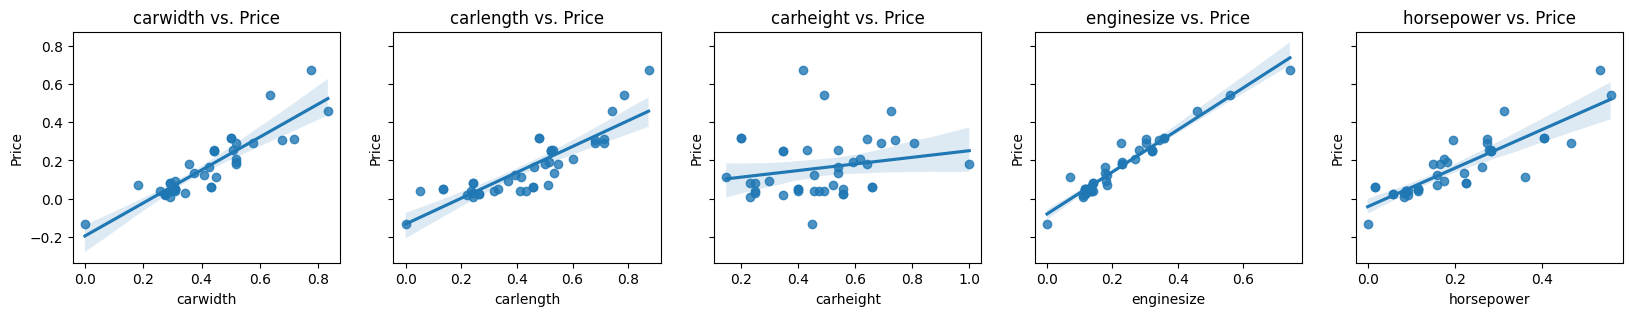

In [76]:
fig, axs = plt.subplots(row, col, figsize = (20, 3), sharey = True)

for i, feature in enumerate(features):
    sns.regplot(x = X_test[:, i], y = model.predict(X_test), ax = axs[i])
    axs[i].set(xlabel = feature, ylabel = "Price", title = f"{feature} vs. Price")

#### Mean Squared Error

In [77]:
MSE = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 0.0076653067433068755
